In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
dataframe = pd.read_csv("./datasets/flight_price_prediction.csv")
print('Data dimensions before cleaning data : ', dataframe.shape)
dataframe = dataframe.dropna()
dataframe = dataframe.drop(['Unnamed: 0','flight',],axis=1)
print('Data dimensions after cleaning data : ',dataframe.shape)

Data dimensions before cleaning data :  (300153, 12)
Data dimensions after cleaning data :  (300153, 10)


In [3]:
dataframe

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
dataframe.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


/var/folders/_7/dv55sgcd0bs_g41db7fwfwsw0000gn/T/ipykernel_24594/3600025124.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(),annot=True)


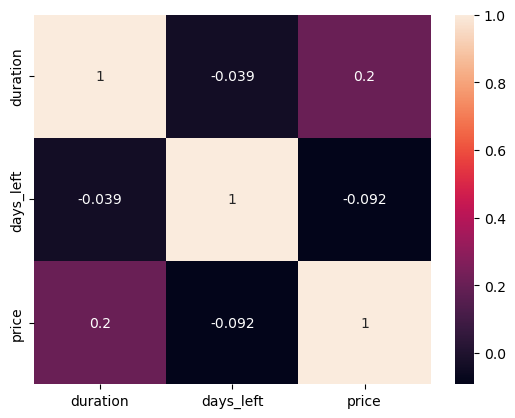

In [5]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(dataframe.corr(),annot=True)
plt.show()

In [6]:
# This is graph between a certain feature data and corresponding values of target
def plot_feature_target_graph(dataframe,feature1,feature2,target):
    sns.scatterplot(data=dataframe, x=feature1, y=feature2, hue=target, style=target, palette=['red', 'blue'])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

# This function is used to plot frequency of a feature with respect to each target
def plot_freq_graph(dataframe, feature, target):
    freq_df = dataframe.groupby(feature)[target].value_counts()
    freq_df.plot(kind='bar')
    plt.xlabel('( ' + feature + ' , ' + target + ' )')
    plt.ylabel('frequency')
    plt.show()


/Users/hrushi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


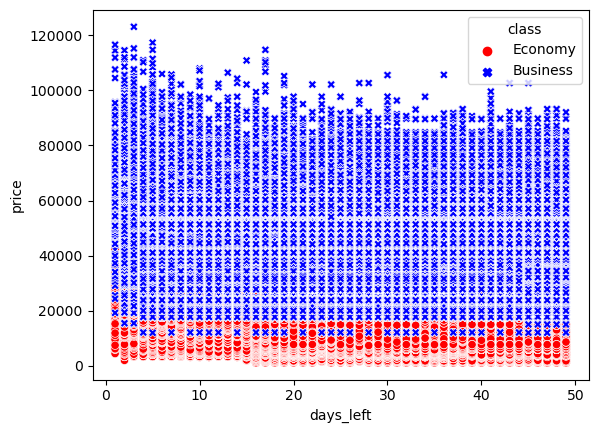

In [7]:
plot_feature_target_graph(dataframe,'days_left','price','class')

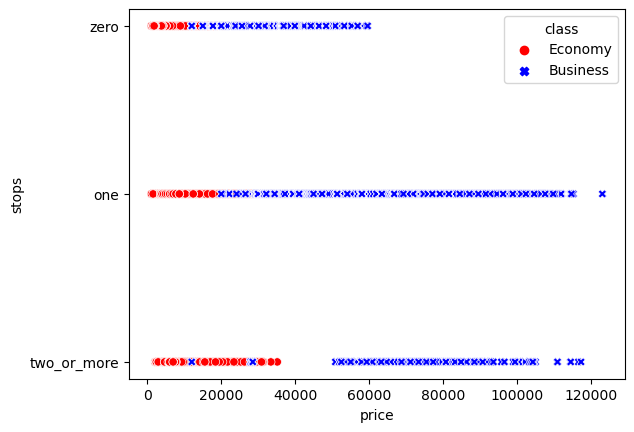

In [34]:
# plot_freq_graph(dataframe,'destination_city','class')
# plot_freq_graph(dataframe,'stops','class')
# plot_freq_graph(dataframe,'airline','class')

plot_feature_target_graph(dataframe,'price','stops','class')

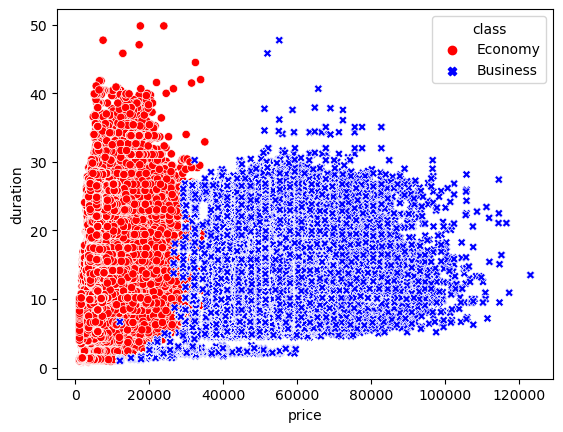

In [35]:
plot_feature_target_graph(dataframe,'price','duration','class')

/Users/hrushi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hrushi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hrushi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hrushi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hrushi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be 

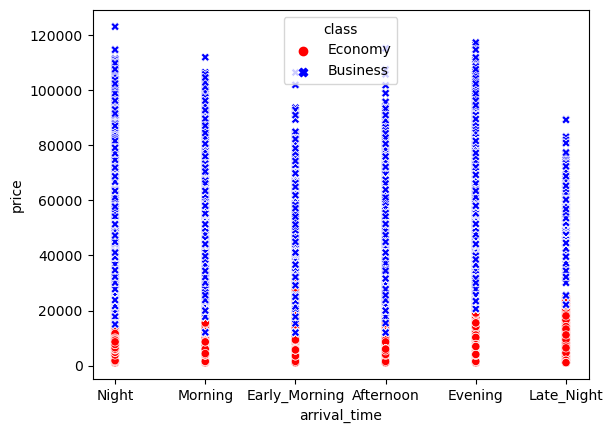

In [36]:
plot_feature_target_graph(dataframe,'arrival_time','price','class')

/var/folders/_7/dv55sgcd0bs_g41db7fwfwsw0000gn/T/ipykernel_304/1500343488.py:3: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=dataframe, x=feature1, y=feature2, hue=target, style=target, palette=['red', 'blue'])


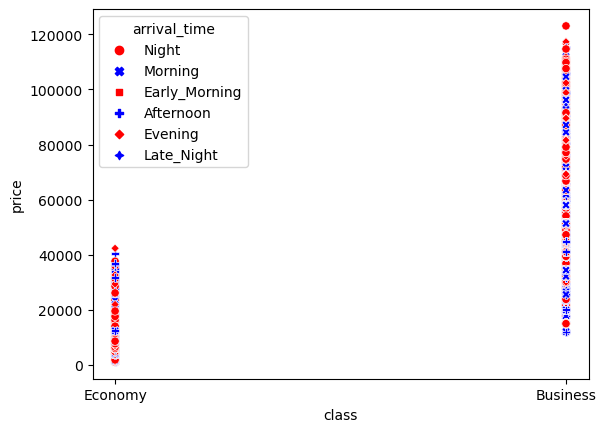

In [37]:
plot_feature_target_graph(dataframe,'class','price','arrival_time')

In [7]:
'''
    Converting object type to categorical format (string type to some integer encoding) using Categorical in pandas

    Categorical : https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html
    factorize : https://pandas.pydata.org/docs/reference/api/pandas.factorize.html?highlight=factorize#pandas.factorize

'''
def normalize(dataframe):
    dataframe_normalized = dataframe.copy()
    for (column, type) in zip(dataframe.columns, dataframe.dtypes):
        if type == 'object':
            dataframe_normalized[column] = pd.Categorical(pd.factorize(dataframe[column])[0])
        else:
            if column != 'price':
                dataframe_normalized[column] = (dataframe[column] - min(dataframe[column]))/max(dataframe[column])
    return dataframe_normalized


In [8]:
dataframe_normalized = normalize(dataframe)

In [9]:

# adding bias to each row of the data in dataframe before spliting data into train and test data.
dataframe_normalized.insert(0,'bias',1)
dataframe_normalized

,bias,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,0,0,0,0,0,0,0,0.026891,0.000000,5953
1,1,0,0,1,0,1,0,0,0.030102,0.000000,5953
2,1,1,0,1,0,2,0,0,0.026891,0.000000,5956
3,1,2,0,2,0,3,0,0,0.028497,0.000000,5955
4,1,2,0,2,0,1,0,0,0.030102,0.000000,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,1,2,5,2,1,4,3,1,0.185631,0.979592,69265
300149,1,2,5,3,1,0,3,1,0.192454,0.979592,77105
300150,1,2,5,1,1,0,3,1,0.260887,0.979592,79099
300151,1,2,5,1,1,4,3,1,0.184026,0.979592,81585


In [10]:
'''
    sample : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
    This method is used to return a random sample of items from an axis of object.

    This method shuffles the dataframe and then split dataframe into input data(with bias) and target
'''
def input_target_split(df,target):
    df = df.sample(frac=1)
    Y = df[target]
    X = df.drop([target], axis=1)
    return X, Y
X,Y = input_target_split(dataframe_normalized, 'price')

In [11]:
'''
    This method is used to split the both input and target into 80% train and 20% test data
'''
def train_test_split(X,Y, percent):
    size = len(X)
    train_size = int(percent * size)
    return X[0:train_size], Y[0:train_size], X[train_size:], Y[train_size:]


In [12]:
X_train, Y_train, X_test, Y_test = train_test_split(X,Y,0.8)

/var/folders/_7/dv55sgcd0bs_g41db7fwfwsw0000gn/T/ipykernel_24594/2774314787.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return X[0:train_size], Y[0:train_size], X[train_size:], Y[train_size:]


In [13]:
X_train.shape

(240122, 10)

In [14]:
Y_train.shape

(240122,)

In [15]:
X_test.shape

(60031, 10)

In [16]:
Y_test.shape

(60031,)

In [17]:
'''
    np.dot -> https://numpy.org/doc/stable/reference/generated/numpy.dot.html
    np.linalg.inv -> https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html
    np.identity -> https://numpy.org/doc/stable/reference/generated/numpy.identity.html
'''
class LinearRegression:
    lamda = 0.0
    __weights = np.zeros(0)
    predicted = np.zeros(0)

    def __init__(self,lamda=0):
        self.lamda = lamda
        weights = np.zeros(0)

    def init(self):
        weights = np.zeros(0)

    def setLamda(self,lamda):
        self.lamda = lamda

    def get_weights(self):
        return self.__weights

    def set_weights(self, weights):
        self.__weights = weights
    
    # This method is used to train the model based on the train data ( train input and corresponding target values)
    def fit(self,X,Y):
        # print(self.lamda)
        x_train = X
        y_train = Y
        self.__weights = np.zeros(x_train.shape[1])

        self.__weights = np.dot(
            np.linalg.inv(np.dot(x_train.T, x_train) + \
            self.lamda*np.identity(x_train.shape[1])),
            np.dot(x_train.T, y_train))
    
    # This method is used to predict the test data and returns the predicted values of test input as list
    def predict(self,X):
        x_test = X.values
        y_pred = [np.dot(self.__weights, x_row) for x_row in x_test]
        self.predicted = y_pred
        return self.predicted

    # This method is used to find the sum of squared errors based on the target values of test data and corresponding predicted data
    def sumSquaredErrors(self,X,Y):
        x_test = X.values

        error = 0.0
        y_pred = self.predicted
        for (target, pred) in zip(Y, y_pred):
            error = error + (target - pred)**2
        return float(error)/float(len(x_test))
        

In [18]:
# This function is used to plot graph between target VS predicted data for test data
def plot_pred_target_feature(X,Y,Y_pred):
    x_data = np.arange(0,100,1)
    plt.plot(x_data, Y[:100], label='Target')
    plt.plot(x_data, Y_pred[:100], label='Predicted')
    plt.xlabel('Data')
    plt.ylabel('target')
    plt.legend()
    plt.show()

# This function is used to train model and return predicted values for test
def run_model_show_stats(model,X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    sserror = model.sumSquaredErrors(X_test, Y_test)
    print('Error : ', sserror)
    
    return y_pred

# took code from checkpoint of Assignment - 1 
# This function is used to write to a pickle file
# https://docs.python.org/3/library/pickle.html
def dump_to_pickle(file_name, data):
    if os.path.exists(file_name):
        os.remove(file_name)
    with open(file_name, 'wb') as f:
        pickle.dump(data, f)
    f.close()

# https://docs.python.org/3/library/pickle.html#pickle.load
# read pickle file
def read_from_pickle(file_path):
    with open(file_path,'rb') as pkl_file:
        pkl_data = pickle.load(pkl_file)
        
    return pkl_data


In [19]:
model = LinearRegression(0)

In [20]:
y_pred = run_model_show_stats(model, X_train, Y_train, X_test, Y_test)

Error :  49688380.927559935


/var/folders/_7/dv55sgcd0bs_g41db7fwfwsw0000gn/T/ipykernel_24594/901704675.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(x_data, Y[:100], label='Target')


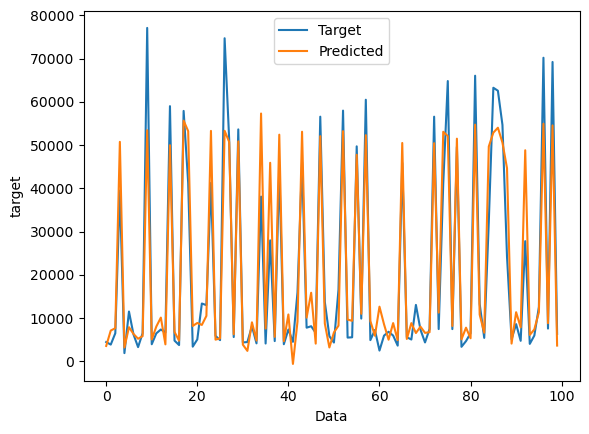

In [21]:
plot_pred_target_feature(X_test,Y_test,y_pred)

In [22]:
dir_name = './pickles/'
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [23]:
dump_to_pickle('./pickles/hpoola_vathota_assignment1_part2.pkl',model.get_weights())

In [28]:
model_ridge = LinearRegression(0.001)

In [29]:
y_pred_ridge = run_model_show_stats(model_ridge, X_train, Y_train, X_test, Y_test)

Error :  49688380.83305757


/var/folders/_7/dv55sgcd0bs_g41db7fwfwsw0000gn/T/ipykernel_24594/901704675.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(x_data, Y[:100], label='Target')


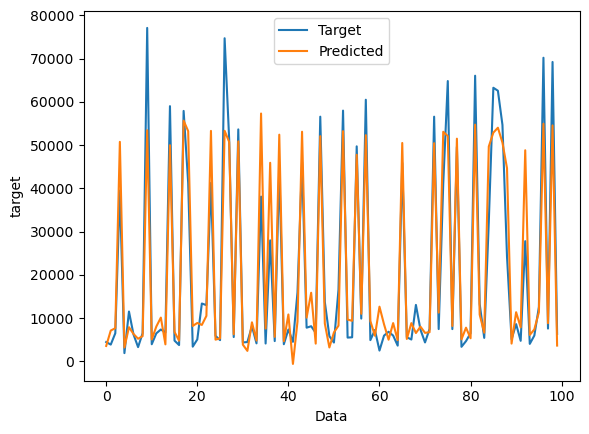

In [30]:
plot_pred_target_feature(X_test,Y_test,y_pred_ridge)

In [31]:
dump_to_pickle('./pickles/hpoola_vathota_assignment1_part3.pkl',model_ridge.get_weights())

In [32]:
dataframe_list = []
model_stats = LinearRegression(0)
for lamda in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,1000,10000,100000,1000000]:
    model_stats.init()
    model_stats.setLamda(lamda)
    model_stats.fit(X_train, Y_train)
    y_pred = model_stats.predict(X_test)
    sserror = model_stats.sumSquaredErrors(X_test, Y_test)
    dataframe_list.append({
        'lamda' : lamda,
        'loss': sserror
    })

df_comp = pd.DataFrame.from_records(dataframe_list)
df_comp



,lamda,loss
0,0.00001,4.968838e+07
1,0.00010,4.968838e+07
2,0.00100,4.968838e+07
3,0.01000,4.968838e+07
4,0.10000,4.968837e+07
5,1.00000,4.968829e+07
6,10.00000,4.968745e+07
7,100.00000,4.968080e+07
8,1000.00000,4.977339e+07
9,1000.00000,4.977339e+07
